# Data Exploration

## Import libraries and dataset

In [3]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
clrs = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
customPalette = sns.set_palette(sns.color_palette(clrs))


In [7]:
nlp = spacy.load('en_core_web_sm')


In [8]:
df = pd.read_csv("data/books_fgo.csv")
df_def = pd.read_csv("data/book_data.csv")

In [9]:
len(df_def.genres.unique())

30095

In [10]:
df.head()

,book_authors,book_desc,book_format,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres
0,Suzanne Collins,Winning will make you famous. Losing means cer...,Hardcover,374.0,4.33,5519135,160706,The Hunger Games,Young Adult
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,Paperback,870.0,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy
2,Harper Lee,The unforgettable novel of a childhood in a sl...,Paperback,324.0,4.27,3745197,79450,To Kill a Mockingbird,Classics
3,Stephenie Meyer,About three things I was absolutely positive.F...,Paperback,498.0,3.58,4281268,97991,Twilight,Young Adult
4,Markus Zusak,Trying to make sense of the horrors of World W...,Hardcover,552.0,4.36,1485632,100821,The Book Thief,Historical


In [11]:
df.shape

(43797, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43797 entries, 0 to 43796
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_authors       43797 non-null  object 
 1   book_desc          43797 non-null  object 
 2   book_format        43068 non-null  object 
 3   book_pages         42280 non-null  float64
 4   book_rating        43797 non-null  float64
 5   book_rating_count  43797 non-null  int64  
 6   book_review_count  43797 non-null  int64  
 7   book_title         43797 non-null  object 
 8   genres             43797 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.0+ MB


In [13]:
df.describe()

,book_pages,book_rating,book_rating_count,book_review_count
count,42280.000000,43797.000000,4.379700e+04,43797.000000
mean,340.658893,4.007218,3.908215e+04,1874.366532
std,250.916782,0.292414,1.887978e+05,6891.203075
min,0.000000,0.000000,0.000000e+00,0.000000
25%,224.000000,3.830000,7.380000e+02,59.000000
50%,316.000000,4.020000,3.656000e+03,240.000000
75%,400.000000,4.200000,1.446000e+04,908.000000
max,14777.000000,5.000000,5.588580e+06,160762.000000


## Plot

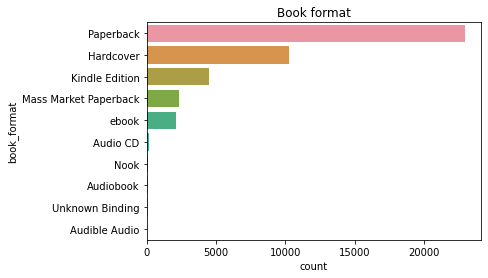

In [22]:

ax = sns.countplot(data = df, y = df["book_format"], palette=customPalette, order=df.book_format.value_counts().iloc[:10].index)
plt.title("Book format")
plt.savefig("plots/book_format.png", dpi = 80)

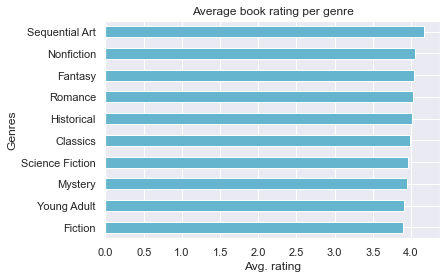

In [18]:
# Avg rating per genre

rating_per_genre = df_def.groupby('genres')['book_rating'].mean().sort_values(ascending=True)
rating_per_genre.plot.barh(color = "c")
plt.ylabel("Genres")
plt.xlabel("Avg. rating")

plt.title("Average book rating per genre")
plt.savefig("plots/avg_book_rating.png", dpi = 80)

In [ ]:
rating_per_genre

### Correlation Matrix

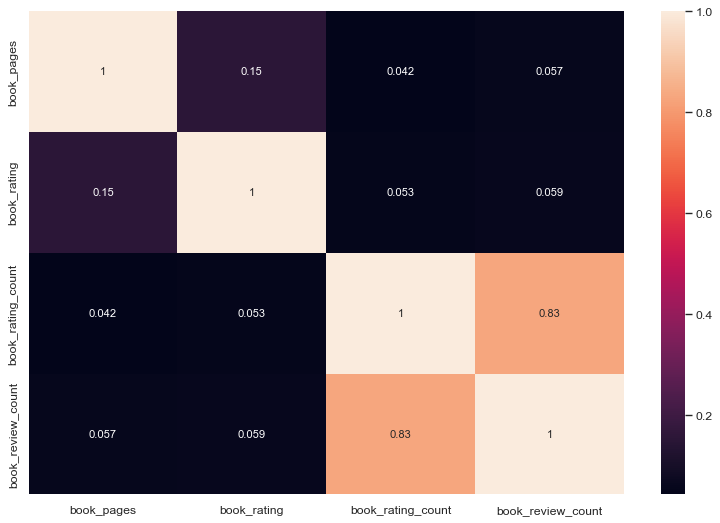

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(12, 8), dpi = 80)
cm = df.corr()
sns.heatmap(cm, annot=True)
plt.show()
plt.savefig("plots/CorrMatrix.png", dpi = 80)

In [7]:
ner_fantasy = pd.read_csv("data/ner_fantasy.csv", index_col=0)
ner_mistery = pd.read_csv("data/ner_mistery.csv", index_col=0)
ner_romance = pd.read_csv("data/ner_romance.csv", index_col=0)
ner_scifi = pd.read_csv("data/ner_scifi.csv", index_col=0)


In [8]:
def eval_column(df):
    df["PER"] = df.PER.map(eval)
    df["ORG"] = df.ORG.map(eval)
    df["LOC"] = df.LOC.map(eval)
    df["MISC"] = df.MISC.map(eval)
    
def quantify_NER(df):
    df['PER_len'] = df["PER"].apply(lambda x: len(x))
    df['ORG_len'] = df["ORG"].apply(lambda x: len(x))
    df['LOC_len'] = df["LOC"].apply(lambda x: len(x))
    df['MISC_len'] = df["MISC"].apply(lambda x: len(x))


In [9]:
eval_column(ner_fantasy)
quantify_NER(ner_fantasy)

In [10]:
eval_column(ner_mistery)
quantify_NER(ner_mistery)

In [11]:
eval_column(ner_scifi)
quantify_NER(ner_scifi)

In [12]:
eval_column(ner_romance)
quantify_NER(ner_romance)

In [42]:
ner_fantasy[12:750]

,book_authors,book_desc,book_rating,book_title,genres,MISC,LOC,ORG,PER,PER_len,ORG_len,LOC_len,MISC_len
92,Cassandra Clare,In a time when Shadowhunters are barely winnin...,4.33,Clockwork Angel,Fantasy,[Shadowhunters],"[London, British Empire]","[Shadowhunters, New York Times, Pandemonium Club]","[Tessa Gray, Will, Jem, Tessa]",4,3,2,1
98,J.K. Rowling|Mary GrandPré,Harry Potter is midway through his training as...,4.54,Harry Potter and the Goblet of Fire,Fantasy,[International Quidditch Cup],[Hogwarts],[],"[Harry Potter, Harry, Dursleys, Harry Potter]",4,0,1,1
100,Christopher Paolini,Eragon and the fledgling dragon must navigate ...,3.88,Eragon,Fantasy,"[Dragon Riders, Dragon Riders]","[Empire, Empire, Empire]",[],"[Eragon, Eragon, Eragon, Eragon, Eragon, Eragon]",6,0,3,2
104,Patrick Rothfuss,"Told in Kvothe's own voice, this is the tale o...",4.55,The Name of the Wind,Fantasy,[The Name of the Wind],[],[],[Kvothe],1,0,0,1
111,J.K. Rowling|Mary GrandPré,When Harry Potter and the Half-Blood Prince op...,4.55,Harry Potter and the Half-Blood Prince,Fantasy,"[the Half-Blood Prince, Wizarding, Muggles, Ap...","[Hogwarts, Parseltongue]","[Order of the Phoenix, Gryffindor Quidditch team]","[Harry Potter, Voldemort, Dumbledore, on.Harry...",22,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,Abbi Glines,You would think after helping save her boyfrie...,4.09,Predestined,Fantasy,[],[],[],"[Hell, Pagan Moore, Leif Montgomery, Pagan, Le...",15,0,0,0
2998,Terry Pratchett|Stephen Briggs,"In this latest #1 international bestseller, th...",4.39,Men at Arms: The Play,Fantasy,"[Discworld, Discworld]",[],"[Soul Music, City Watch]",[],0,2,0,2
2999,Mercedes Lackey,"The wild magic is taking its toll on the land,...",4.21,Magic's Promise,Fantasy,"[Herald-Mage, Yfandes, Herald-Mage]",[Lineas],[Companion],[Vanyel],1,1,1,3
3000,Robin Hobb,King Shrewd is dead at the hands of his son Re...,4.18,Assassin's Quest,Fantasy,"[Six Duchies, Assassin ’s Quest “ Fantasy, Kir...",[],[],"[Shrewd, Regal, Fitz, Regal, Prince Verity, Ve...",13,0,0,3


In [20]:
ner_fantasy[ner_fantasy["book_title"] =="The Lord Of The Rings"]

,book_authors,book_desc,book_rating,book_title,genres,MISC,LOC,ORG,PER,PER_len,ORG_len,LOC_len,MISC_len


In [53]:
stacked = ner_fantasy.append([ner_mistery, ner_romance, ner_scifi])

<ipython-input-53-15ba7e886b17>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stacked = ner_fantasy.append([ner_mistery, ner_romance, ner_scifi])


<ipython-input-100-faec342112a0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grpByGenre = stacked.groupby(['genres'])['PER_len','ORG_len','MISC_len', 'LOC_len'].aggregate(np.sum)


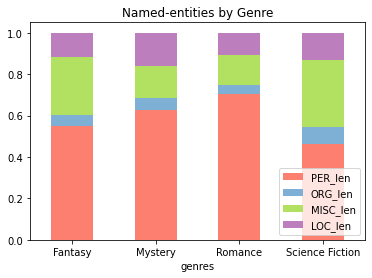

In [100]:
grpByGenre = stacked.groupby(['genres'])['PER_len','ORG_len','MISC_len', 'LOC_len'].aggregate(np.sum)
genre_norm = grpByGenre.div(grpByRole.sum(1).astype(float), axis=0)
ax = genre_norm.plot(kind = 'bar', stacked = True, colormap = customPalette,
 title = 'Named-entities by Genre', rot = 0)
plt.legend(loc='lower right')# bbox_to_anchor=(1.0, 0.5))
plt.savefig("plots/NER_genre.png")